# HIV Testing Intervention

Tests and code for the creation of a new HIV testing intervention. 

In [1]:
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [2]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )


# HIV settings and interventions
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 50   # Is this working with init_states?
              }
hiv = ss.HIV( pars=hiv_params )

hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest( start=1995 )


# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }


# Create and run simulation
sim = ss.Sim( pars          = sim_params,
              people        = ppl, 
              demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases      = [ hiv, ss.Gonorrhea() ],
              interventions = [ hiv_simple_diagnostic ]
             )
sim.initialize()
sim.run()

Initializing sim (warning: not resetting sim.people) with 10000 agents
... initializing SimpleDiagnosticTest: 
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (1.41 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (1.48 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (1.55 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (1.64 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (1.72 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (1.84 s)  ••••••••••••••••••—— 92%


[<class 'stisim.sim.Sim'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  finalize()          init_people()       shrink()            
  init_analyzers()    init_time_vecs()    step()              
  init_demographi...  initialize()        validate_dt()       
  init_diseases()     load()              validate_pars()     
  init_interventi...  run()               validate_post_i...  
  init_networks()     save()              
————————————————————————————————————————————————————————————
Properties:
  dt                  year                
————————————————————————————————————————————————————————————
    analyzers: objdict()
     complete: True
   connectors: None
      created: None
 demographics: #0. 'pregnancy':
               [ [...]
     diseases: #0. 'hiv':
               [<class 'stisim.hiv.HI [...]
     filename: None
  initialized: True
interventions: #0. 'simplediagnostictest':
               <stis

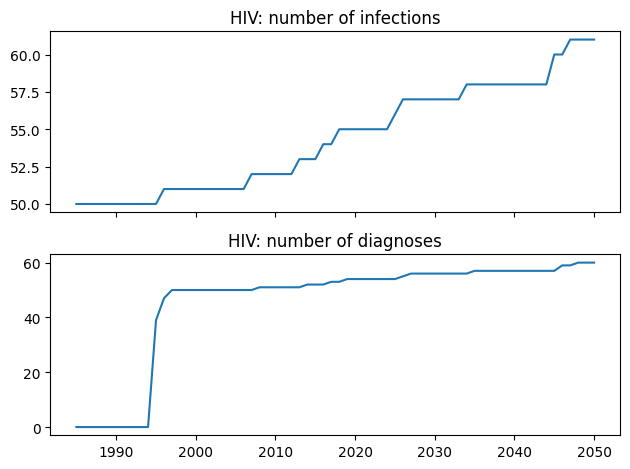

In [12]:
fig, axs = plt.subplots( 2, 1, sharex=True )

axs[0].plot( sim.yearvec, sim.results.hiv.n_infected )
axs[0].set_title( 'HIV: number of infections' )

axs[1].plot( sim.yearvec, sim.results.hiv.n_diagnosed )
axs[1].set_title( 'HIV: number of diagnoses' )

fig.tight_layout()

## Testing intervention

In [5]:
ppl.states.keys()

['age',
 'female',
 'debut',
 'alive',
 'ti_dead',
 'scale',
 'hiv.rel_sus',
 'hiv.rel_sev',
 'hiv.rel_trans',
 'hiv.susceptible',
 'hiv.infected',
 'hiv.ti_infected',
 'hiv.on_art',
 'hiv.cd4',
 'hiv.diagnosed',
 'hiv.ti_diagnosed',
 'gonorrhea.rel_sus',
 'gonorrhea.rel_sev',
 'gonorrhea.rel_trans',
 'gonorrhea.susceptible',
 'gonorrhea.infected',
 'gonorrhea.ti_infected',
 'gonorrhea.ti_recovered',
 'gonorrhea.ti_dead']

In [6]:
sim.results.keys()

['n_alive', 'new_deaths', 'pregnancy', 'hiv', 'gonorrhea']

In [7]:
sim.results.hiv

#0. 'n_susceptible':
Result(hiv.n_susceptible):
array([10086, 10243, 10387, 10554, 10708, 10888, 11048, 11206, 11361,
        11511, 11697, 11878, 12056, 12249, 12426, 12633, 12796, 12959,
        13143, 13315, 13508, 13711, 13892, 14076, 14286, 14494, 14714,
        14950, 15159, 15390, 15636, 15873, 16087, 16313, 16587, 16834,
        17133, 17381, 17639, 17895, 18183, 18441, 18724, 19007, 19299,
        19601, 19905, 20232, 20550, 20854, 21166, 21471, 21816, 22136,
        22488, 22860, 23178, 23563, 23916, 24240, 24580, 24958, 25333,
        25711, 26105, 26480])
————————————————————————————————————————
#1. 'n_infected':
Result(hiv.n_infected):
array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 53, 53, 53, 54,
        54, 55, 55, 55, 55, 55, 55, 55, 56, 57, 57, 57, 57, 57, 57, 57,
        57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 60, 60, 61, 61,
        61, 61])
———————————————————————————————————————